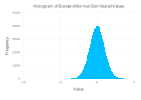

In [1]:
using Random
using Distributions
using Gadfly
Gadfly.push_theme(Theme(background_color="white"))
# Generate 10,000 standard normal distributed values

mean = 0
std_dev = 1

dist = Normal(mean, std_dev)

data = rand(dist, 1000000)

# Create a plot
plot(x=data, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram of Standard Normal Distributed Values"))


In [2]:
data

1000000-element Vector{Float64}:
 -0.5114807238660385
  1.195036717532876
 -0.11457342896731589
  0.42125134110443796
 -0.6278438017555867
  0.12213477743164351
  0.292791332825809
 -0.13423498049047736
  0.966278620726923
 -0.8764908808148028
  ⋮
 -0.5282611138045431
 -0.518160389244887
 -0.36231561346655455
  0.031749994873461265
 -1.173098956527765
 -0.7198988114802037
 -0.25294808953251735
 -0.24912850117840313
 -0.31701967066380743

In [3]:
function generate_n_bit_numbers(n, a)
    numbers = []
    for i in 0:(2^n - 1)
        binary_str = bitstring(i)[end-n+1:end]
        transformed = [c == '0' ? -a : a for c in binary_str]
        push!(numbers, transformed)
    end
    return numbers
end

function generate_n_bit_numbers_alpha(n, a)
    numbers = []
    for i in 0:(2^n - 1)
        binary_str = bitstring(i)[end-n+1:end]
        transformed = [c == '0' ? a : 1 for c in binary_str]
        push!(numbers, transformed)
    end
    return numbers
end



n = 3  # Example for 3-bit numbers
a = 1  # Weight value
weights = generate_n_bit_numbers(n, a)

8-element Vector{Any}:
 [-1, -1, -1]
 [-1, -1, 1]
 [-1, 1, -1]
 [-1, 1, 1]
 [1, -1, -1]
 [1, -1, 1]
 [1, 1, -1]
 [1, 1, 1]

In [4]:
# Generate Linear Combinations of the n chunks 

mutable struct LinearCombination
    weights::Vector{Float32}
    inputs::Vector{Float32}
    value::Float32
end 

struct LinearCombinationSet
    combination::Vector{LinearCombination}
end 

lincombs = collect(
    map(
        set -> begin
            LinearCombinationSet(
                collect(map(
                    weights -> begin
                        LinearCombination(weights, set, sum(weights .* set))
                    end,
                    weights
                ))
            )
        end, 
        Iterators.partition(data, n)
    )
)

333334-element Vector{LinearCombinationSet}:
 LinearCombinationSet(LinearCombination[LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[-0.51148075, 1.1950368, -0.11457343], -0.56898254f0), LinearCombination(Float32[-1.0, -1.0, 1.0], Float32[-0.51148075, 1.1950368, -0.11457343], -0.79812944f0), LinearCombination(Float32[-1.0, 1.0, -1.0], Float32[-0.51148075, 1.1950368, -0.11457343], 1.8210908f0), LinearCombination(Float32[-1.0, 1.0, 1.0], Float32[-0.51148075, 1.1950368, -0.11457343], 1.591944f0), LinearCombination(Float32[1.0, -1.0, -1.0], Float32[-0.51148075, 1.1950368, -0.11457343], -1.591944f0), LinearCombination(Float32[1.0, -1.0, 1.0], Float32[-0.51148075, 1.1950368, -0.11457343], -1.8210908f0), LinearCombination(Float32[1.0, 1.0, -1.0], Float32[-0.51148075, 1.1950368, -0.11457343], 0.79812944f0), LinearCombination(Float32[1.0, 1.0, 1.0], Float32[-0.51148075, 1.1950368, -0.11457343], 0.56898254f0)])
 LinearCombinationSet(LinearCombination[LinearCombination(Float32[-1.0, -1.0, -1

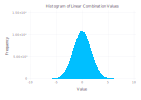

In [5]:
# plot all the values that fall out of this linear combination Vector

# Extract all the values to bastel them in there: 

lincomb_raw = reduce(vcat, map(set -> map(lc -> lc.value, set.combination), lincombs))

plot(x=lincomb_raw, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram of Linear Combination Values"))

In [6]:
include("julia_code/bach.jl")

filtered = bach_enroll_first(lincombs)

333334-element Vector{LinearCombination}:
 LinearCombination(Float32[-1.0, 1.0, -1.0], Float32[-0.51148075, 1.1950368, -0.11457343], 1.8210908f0)
 LinearCombination(Float32[-1.0, 1.0, -1.0], Float32[0.42125133, -0.6278438, 0.122134775], -1.17123f0)
 LinearCombination(Float32[-1.0, 1.0, -1.0], Float32[0.29279134, -0.13423498, 0.9662786], -1.393305f0)
 LinearCombination(Float32[-1.0, 1.0, 1.0], Float32[-0.8764909, 0.3898786, 0.42014486], 1.6865143f0)
 LinearCombination(Float32[-1.0, -1.0, 1.0], Float32[0.5434548, 1.428227, -0.08903975], -2.0607216f0)
 LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[2.0203552, 1.1668856, 0.22705741], -3.414298f0)
 LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[1.2123778, 2.7520053, 0.91110003], -4.8754835f0)
 LinearCombination(Float32[-1.0, -1.0, 1.0], Float32[1.3444922, 0.81164324, -0.44322583], -2.5993612f0)
 LinearCombination(Float32[-1.0, -1.0, -1.0], Float32[0.8331141, 0.20198312, 0.3519726], -1.3870698f0)
 LinearCombination(Float32[-1.0, 

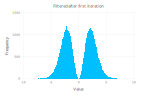

In [7]:
filtered_raw = collect(map(comb -> comb.value, filtered))

plot(x=filtered_raw, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Filtered after first iteration"))

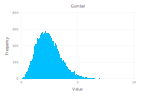

In [8]:
# Split the resulting values into two seperate sets for which we will do the things 

function plot_histogram(lincombs::Vector{LinearCombination}, title, save_to_file::Bool=false)
    p = plot(x=collect(map(comb -> comb.value, lincombs)), Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title(title))
    if save_to_file
        draw(SVG(title * ".svg"), p)
    end
    return p
end

filtered_split = filter(x -> x.value > 0, filtered)

plot_histogram(filtered_split, "Gumbel")

In [ ]:
# Count all the elements in this half of the distribution and define the next bound based on the half of this distribution

index = floor(length(filtered_split) / 2)

# Sort the values to find the bound 

sorted_filtered_split = sort(filtered_split, by = x -> x.value)

bound = sorted_filtered_split[convert(Int, index)].value

# Modify everyLinearCombination in filtered_split with the additon of a smaller, fractional weight. 

# For that, alter every linear combination entry to generate a new linear combination set 

additional_weights = generate_n_bit_numbers(n, 0.3)

filtered_split[1].inputs

new_combinations = collect(map(combination -> begin
    LinearCombinationSet(collect(map(weights_vector -> begin
        weights = combination.weights + weights_vector
        return LinearCombination(weights, combination.inputs, sum(weights .* combination.inputs))
    end,additional_weights)))
end,filtered_split))

new_combinations


166415-element Vector{LinearCombinationSet}:
 LinearCombinationSet(LinearCombination[LinearCombination(Float32[-1.5, 0.5, -1.5], Float32[-0.51148075, 1.1950368, -0.11457343], 1.5365996f0), LinearCombination(Float32[-1.5, 0.5, -0.5], Float32[-0.51148075, 1.1950368, -0.11457343], 1.4220263f0), LinearCombination(Float32[-1.5, 1.5, -1.5], Float32[-0.51148075, 1.1950368, -0.11457343], 2.7316365f0), LinearCombination(Float32[-1.5, 1.5, -0.5], Float32[-0.51148075, 1.1950368, -0.11457343], 2.617063f0), LinearCombination(Float32[-0.5, 0.5, -1.5], Float32[-0.51148075, 1.1950368, -0.11457343], 1.025119f0), LinearCombination(Float32[-0.5, 0.5, -0.5], Float32[-0.51148075, 1.1950368, -0.11457343], 0.91054547f0), LinearCombination(Float32[-0.5, 1.5, -1.5], Float32[-0.51148075, 1.1950368, -0.11457343], 2.2201557f0), LinearCombination(Float32[-0.5, 1.5, -0.5], Float32[-0.51148075, 1.1950368, -0.11457343], 2.1055822f0)])
 LinearCombinationSet(LinearCombination[LinearCombination(Float32[-1.5, 0.5, 0.5], 

In [24]:
include("julia_code/bach.jl")
# Bounds to optimize away from are: bound and 0. 
# 0 has as special condition that no values below 0 are allowed

filtered_new = enroll(bound, new_combinations)

166415-element Vector{LinearCombination}:
 LinearCombination(Float32[-0.5, 0.5, -0.5], Float32[-0.51148075, 1.1950368, -0.11457343], 0.91054547f0)
 LinearCombination(Float32[-0.5, 0.5, 0.5], Float32[-0.8764909, 0.3898786, 0.42014486], 0.8432572f0)
 LinearCombination(Float32[-0.5, -0.5, 0.5], Float32[-0.5412102, -0.18041411, 0.08068198], 0.40115315f0)
 LinearCombination(Float32[-0.5, 0.5, 0.5], Float32[-0.5426729, 0.18129173, 1.2508154], 0.98739f0)
 LinearCombination(Float32[-1.5, 1.5, 1.5], Float32[-0.5463891, 0.6782221, 1.6162902], 4.261352f0)
 LinearCombination(Float32[-0.5, -0.5, 0.5], Float32[-0.5748222, -1.025346, 0.17916162], 0.88966495f0)
 LinearCombination(Float32[-0.5, 0.5, 0.5], Float32[-0.1014758, 1.4463179, 0.3267348], 0.93726426f0)
 LinearCombination(Float32[-0.5, -0.5, 0.5], Float32[-0.43081552, -0.62369686, 0.21552876], 0.63502055f0)
 LinearCombination(Float32[-0.5, -0.5, -0.5], Float32[-0.15312637, -1.2286125, -0.6498092], 1.015774f0)
 LinearCombination(Float32[-0.5, -0

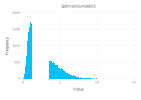

In [25]:
plot_histogram(filtered_new, "Splitted Gumbel0.5")

In [26]:
before_bound = count(x -> x.value < bound, filtered_new)
after_bound = count(x -> x.value >= bound, filtered_new)

println("Number of LinearCombination objects before the bound: ", before_bound)
println("Number of LinearCombination objects after the bound: ", after_bound)

Number of LinearCombination objects before the bound: 83206
Number of LinearCombination objects after the bound: 83209
